In [1]:
health_data = read.csv("health_data.csv")

library(dplyr)
library(tidyr)
library(ggplot2)
library(GGally)
library(fastDummies)
library(reshape2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'fastDummies' was built under R version 4.3.3"
Warning message:
"package 'reshape2' was built under R version 4.3.3"

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [2]:
head(health_data)
summary(health_data)



health_data= health_data %>% separate(BloodPressure, c("BloodPressureNumerator","BloodPressureDenominator"),"/")

health_data$`BloodPressureNumerator` <- as.numeric(as.character(health_data$`BloodPressureNumerator`))
health_data$`BloodPressureDenominator` <- as.numeric(as.character(health_data$`BloodPressureDenominator`))

health_data %>% summarise_all(~sum(is.na(.)))



numeric_data = health_data[,unlist(lapply(health_data, is.numeric))]
cat_data = health_data[,unlist(lapply(health_data, is.character))]


,PatientID,Age,Gender,BMI,SmokingStatus,AlcoholConsumption,ExerciseFrequency,CholesterolLevel,BloodPressure,Diabetes,HeartDisease,PhysicalActivityLevel,DietQuality,MedicationAdherence,AnnualCheckups,GeneticRisk,HealthcareCost,Outcome
,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,1,82,Male,27.72798,Never,Never,Never,170.5041,124/80,No,Yes,Low,Average,Medium,2,0.89,20974.84,Healthy
2,2,62,Female,26.12258,Former,Never,Sometimes,183.7046,155/75,Yes,No,Low,Good,Medium,1,0.95,12693.40,Healthy
3,3,26,Female,37.61520,Never,Occasionally,Never,256.5829,100/96,No,No,Medium,Average,High,1,1.00,13103.52,Critical
4,4,64,Male,33.12029,Current,Never,Sometimes,163.4861,159/82,No,No,Medium,Average,Medium,3,1.00,15920.20,Healthy
5,5,34,Female,30.66780,Never,Regularly,Sometimes,247.2195,131/80,No,No,Medium,Average,High,4,1.00,18529.89,Critical
6,6,34,Male,28.12764,Never,Never,Sometimes,173.1878,144/93,Yes,No,Medium,Poor,Medium,3,0.97,12930.51,Healthy


   PatientID           Age           Gender               BMI       
 Min.   :     1   Min.   :18.00   Length:300000      Min.   :15.00  
 1st Qu.: 75001   1st Qu.:35.00   Class :character   1st Qu.:26.63  
 Median :150001   Median :53.00   Mode  :character   Median :30.13  
 Mean   :150001   Mean   :53.49                      Mean   :30.07  
 3rd Qu.:225000   3rd Qu.:72.00                      3rd Qu.:33.62  
 Max.   :300000   Max.   :89.00                      Max.   :40.00  
 SmokingStatus      AlcoholConsumption ExerciseFrequency  CholesterolLevel
 Length:300000      Length:300000      Length:300000      Min.   :100.0   
 Class :character   Class :character   Class :character   1st Qu.:192.5   
 Mode  :character   Mode  :character   Mode  :character   Median :214.5   
                                                          Mean   :214.6   
                                                          3rd Qu.:236.6   
                                                          Max.   :3

PatientID,Age,Gender,BMI,SmokingStatus,AlcoholConsumption,ExerciseFrequency,CholesterolLevel,BloodPressureNumerator,BloodPressureDenominator,Diabetes,HeartDisease,PhysicalActivityLevel,DietQuality,MedicationAdherence,AnnualCheckups,GeneticRisk,HealthcareCost,Outcome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
health_data_clean = health_data

health_data_clean$Gender = factor(health_data_clean$Gender,level = c('Male','Female',"Other"))
health_data_clean$SmokingStatus = factor(health_data_clean$SmokingStatus,levels = c('Never','Former','Current'))
health_data_clean$AlcoholConsumption = factor(health_data_clean$AlcoholConsumption,levels = c('Never','Occasionally','Regularly'))
health_data_clean$ExerciseFrequency = factor(health_data_clean$ExerciseFrequency,levels = c('Never','Sometimes','Often','Rarely'))
health_data_clean$PhysicalActivityLevel = factor(health_data_clean$PhysicalActivityLevel,levels = c('Low','Medium','High'))
health_data_clean$DietQuality = factor(health_data_clean$DietQuality,levels = c('Average','Good','Poor'))
health_data_clean$MedicationAdherence = factor(health_data_clean$MedicationAdherence,levels = c('Medium','High','Low'))
health_data_clean$Outcome = factor(health_data_clean$Outcome,levels = c('Healthy','Critical','At Risk'))

library(fastDummies)

health_data_lm = dummy_cols(health_data_clean,select_columns = c("Gender","SmokingStatus","AlcoholConsumption","ExerciseFrequency","Diabetes","HeartDisease","PhysicalActivityLevel","DietQuality","MedicationAdherence","Outcome"))
health_data_lm = subset(health_data_lm, select=-c(Gender,SmokingStatus,AlcoholConsumption,ExerciseFrequency,Diabetes,HeartDisease,PhysicalActivityLevel,DietQuality,MedicationAdherence,Outcome,PatientID))
names(health_data_lm)[names(health_data_lm) == 'Outcome_At Risk'] <- 'Outcome_at_risk'


Linear Regression - Random Forest


In [4]:
library(randomForest)
library(ranger)

Warning message:
"package 'randomForest' was built under R version 4.3.3"
randomForest 4.7-1.1



Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'ranger' was built under R version 4.3.3"

Attaching package: 'ranger'


The following object is masked from 'package:randomForest':

    importance




In [5]:
rand_forest_hc <- ranger(
  HealthcareCost ~ ., 
  data = health_data_lm, 
  mtry = 3, 
  num.trees = 100, 
  importance = 'impurity'
)

print(rand_forest_hc)

Growing trees.. Progress: 81%. Estimated remaining time: 7 seconds.
Ranger result

Call:
 ranger(HealthcareCost ~ ., data = health_data_lm, mtry = 3, num.trees = 100,      importance = "impurity") 

Type:                             Regression 
Number of trees:                  100 
Sample size:                      300000 
Number of independent variables:  36 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         impurity 
Splitrule:                        variance 
OOB prediction error (MSE):       27403663 
R squared (OOB):                  0.3519425 


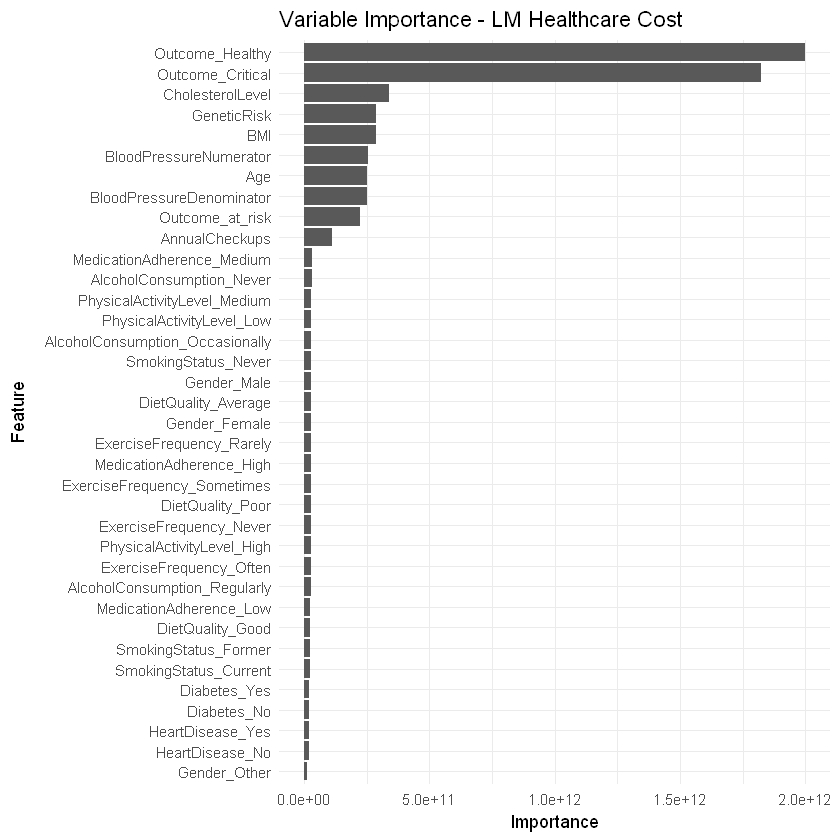

In [6]:
importance_score = rand_forest_hc$variable.importance
important_vars_df = data.frame(Variables = names(importance_score),Score= importance_score)

ggplot(important_vars_df, aes(x = reorder(Variables, Score), y = Score)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance - LM Healthcare Cost",
       x = "Feature",
       y = "Importance") +
  theme_minimal()

Logstic Regression - Random Forest

In [7]:
library(nnet)
library(speedglm)

Warning message:
"package 'nnet' was built under R version 4.3.3"


In [8]:

library(speedglm)

Warning message:
"package 'speedglm' was built under R version 4.3.3"
Loading required package: Matrix




Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: biglm

Warning message:
"package 'biglm' was built under R version 4.3.3"
Loading required package: DBI



In [9]:
library(randomForest)
library(ranger)

Log Regression - Outcome

In [10]:
health_data_log_reg = dummy_cols(health_data,select_columns = c("Gender","SmokingStatus","AlcoholConsumption","ExerciseFrequency","Diabetes","HeartDisease","PhysicalActivityLevel","DietQuality","MedicationAdherence","Outcome"))
names(health_data_log_reg)[names(health_data_log_reg) == 'Outcome_At Risk'] <- 'Outcome_at_risk'
health_data_log_reg_outcome <- subset(health_data_log_reg, select = -c(Outcome_at_risk,Outcome_Critical,Outcome_Healthy,PatientID,Gender,SmokingStatus,AlcoholConsumption,ExerciseFrequency,PhysicalActivityLevel,PhysicalActivityLevel,DietQuality,MedicationAdherence,Gender_Other,Diabetes,MedicationAdherence_Medium,ExerciseFrequency_Sometimes,AlcoholConsumption_Regularly,SmokingStatus_Never))
health_data_log_reg_outcome$Outcome <- as.factor(health_data_log_reg_outcome$Outcome)

In [11]:
colnames(health_data_log_reg_outcome)

[1] "Age"                             "BMI"                            
 [3] "CholesterolLevel"                "BloodPressureNumerator"         
 [5] "BloodPressureDenominator"        "HeartDisease"                   
 [7] "AnnualCheckups"                  "GeneticRisk"                    
 [9] "HealthcareCost"                  "Outcome"                        
[11] "Gender_Female"                   "Gender_Male"                    
[13] "SmokingStatus_Current"           "SmokingStatus_Former"           
[15] "AlcoholConsumption_Never"        "AlcoholConsumption_Occasionally"
[17] "ExerciseFrequency_Never"         "ExerciseFrequency_Often"        
[19] "ExerciseFrequency_Rarely"        "Diabetes_No"                    
[21] "Diabetes_Yes"                    "HeartDisease_No"                
[23] "HeartDisease_Yes"                "PhysicalActivityLevel_High"     
[25] "PhysicalActivityLevel_Low"       "PhysicalActivityLevel_Medium"   
[27] "DietQuality_Average"             "DietQuality_Good"               
[29] "DietQuality_Poor"                "MedicationAdherence_High"       
[31] "MedicationAdherence_Low"

In [99]:
health_data_log_reg = dummy_cols(health_data,select_columns = c("Gender","SmokingStatus","AlcoholConsumption","ExerciseFrequency","Diabetes","HeartDisease","PhysicalActivityLevel","DietQuality","MedicationAdherence","Outcome"))
names(health_data_log_reg)[names(health_data_log_reg) == 'Outcome_At Risk'] <- 'Outcome_at_risk'
health_data_log_reg_exercise <- subset(health_data_log_reg, select = -c(ExerciseFrequency_Never,ExerciseFrequency_Often,ExerciseFrequency_Rarely,Outcome_Healthy,PatientID,Gender,SmokingStatus,AlcoholConsumption,PhysicalActivityLevel,PhysicalActivityLevel,DietQuality,MedicationAdherence,Gender_Other,Diabetes,MedicationAdherence_Medium,ExerciseFrequency_Sometimes,AlcoholConsumption_Regularly,SmokingStatus_Never))
health_data_log_reg_exercise$ExerciseFrequency <- as.factor(health_data_log_reg_exercise$ExerciseFrequency)

In [100]:
rand_forest_log_exercise <- ranger(
  ExerciseFrequency ~ ., 
  data = health_data_log_reg_exercise, 
  mtry = 3, 
  num.trees = 100, 
  importance = 'impurity'
)
print(rand_forest_log_exercise)

Growing trees.. Progress: 75%. Estimated remaining time: 10 seconds.
Ranger result

Call:
 ranger(ExerciseFrequency ~ ., data = health_data_log_reg_exercise,      mtry = 3, num.trees = 100, importance = "impurity") 

Type:                             Classification 
Number of trees:                  100 
Sample size:                      300000 
Number of independent variables:  30 
Mtry:                             3 
Target node size:                 1 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error:             70.09 % 


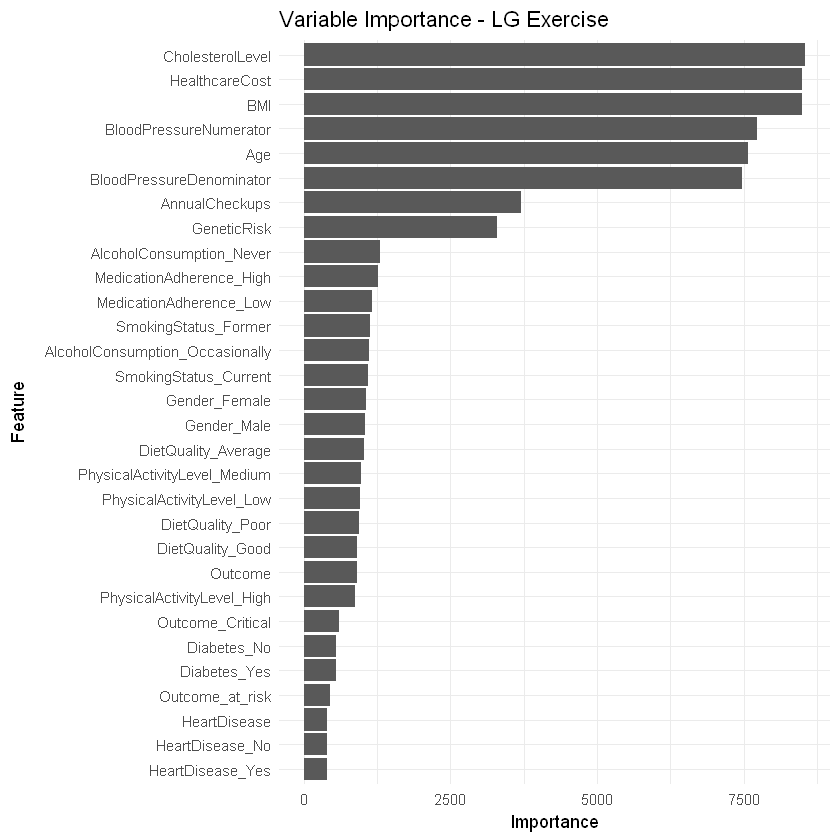

In [101]:
importance_scores_exercise = rand_forest_log_exercise$variable.importance
important_vars_df_log_exercise = data.frame(Variables = names(importance_scores_exercise),Score= importance_scores_exercise)

ggplot(important_vars_df_log_exercise, aes(x = reorder(Variables, Score), y = Score)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance - LG Exercise",
       x = "Feature",
       y = "Importance") +
  theme_minimal()

In [12]:
rand_forest_log <- ranger(
  Outcome ~ ., 
  data = health_data_log_reg_outcome, 
  mtry = 3, 
  num.trees = 100, 
  importance = 'impurity'
)
print(rand_forest_log)

Ranger result

Call:
 ranger(Outcome ~ ., data = health_data_log_reg_outcome, mtry = 3,      num.trees = 100, importance = "impurity") 

Type:                             Classification 
Number of trees:                  100 
Sample size:                      300000 
Number of independent variables:  30 
Mtry:                             3 
Target node size:                 1 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error:             17.91 % 


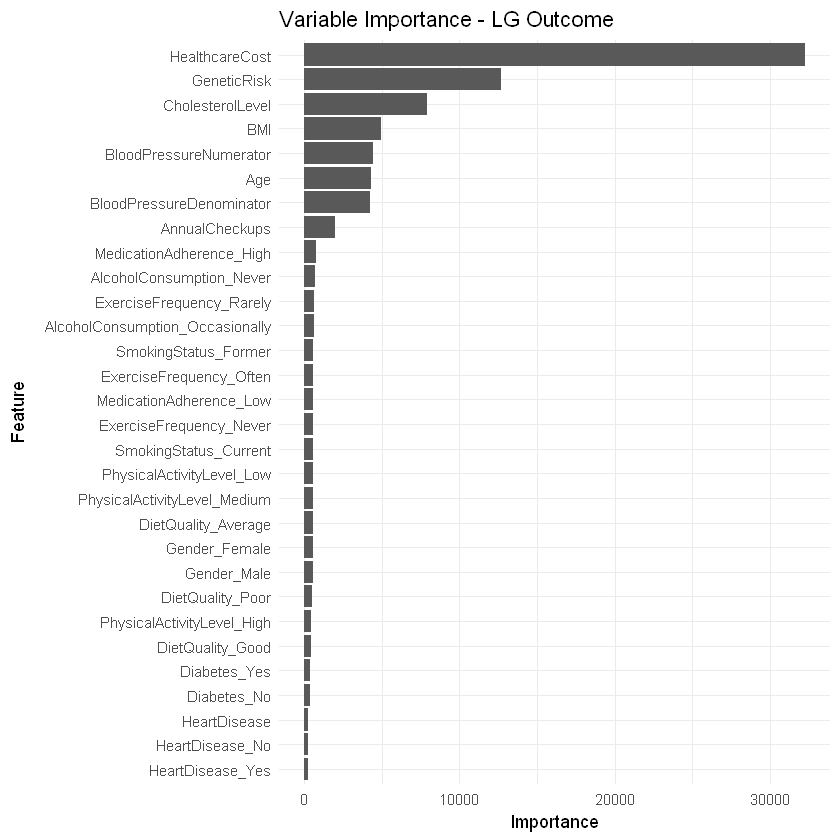

In [13]:
importance_scores = rand_forest_log$variable.importance
important_vars_df_log = data.frame(Variables = names(importance_scores),Score= importance_scores)

ggplot(important_vars_df_log, aes(x = reorder(Variables, Score), y = Score)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance - LG Outcome",
       x = "Feature",
       y = "Importance") +
  theme_minimal()

Log Regression - Heart Disease

In [46]:
health_data_log_reg = dummy_cols(health_data,select_columns = c("Gender","SmokingStatus","AlcoholConsumption","ExerciseFrequency","Diabetes","HeartDisease","PhysicalActivityLevel","DietQuality","MedicationAdherence","Outcome"))
names(health_data_log_reg)[names(health_data_log_reg) == 'Outcome_At Risk'] <- 'Outcome_at_risk'
health_data_log_reg_heart_disease <- subset(health_data_log_reg, select = -c(HealthcareCost,HeartDisease_No,HeartDisease_Yes,PatientID,Gender,SmokingStatus,AlcoholConsumption,ExerciseFrequency,PhysicalActivityLevel,PhysicalActivityLevel,DietQuality,MedicationAdherence,Gender_Other,Diabetes,MedicationAdherence_Medium,ExerciseFrequency_Sometimes,AlcoholConsumption_Regularly,SmokingStatus_Never))
health_data_log_reg_heart_disease$HeartDisease <- as.factor(health_data_log_reg_heart_disease$HeartDisease)

In [79]:
rand_forest_log_heart_disease <- ranger(
  HeartDisease ~ ., 
  data = health_data_log_reg_heart_disease, mtry = 3, 
  num.trees = 150, 
  probability = TRUE, 
  importance = 'impurity'
)
print(rand_forest_log_heart_disease)

Growing trees.. Progress: 66%. Estimated remaining time: 15 seconds.
Ranger result

Call:
 ranger(HeartDisease ~ ., data = health_data_log_reg_heart_disease,      mtry = 3, num.trees = 150, probability = TRUE, importance = "impurity") 

Type:                             Probability estimation 
Number of trees:                  150 
Sample size:                      300000 
Number of independent variables:  30 
Mtry:                             3 
Target node size:                 10 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.09014097 


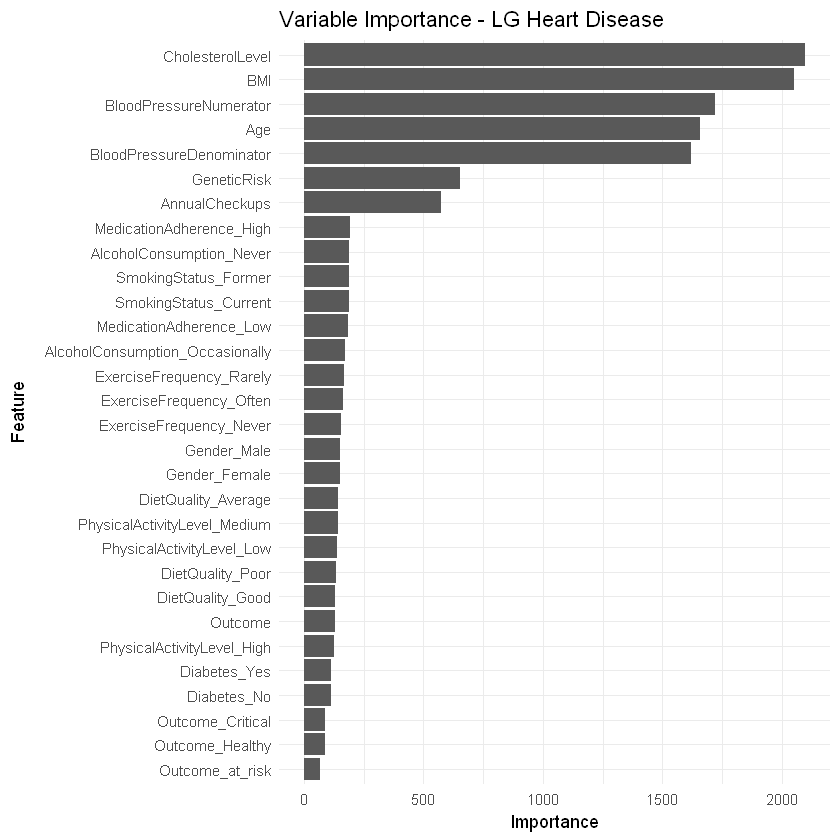

In [80]:
importance_scores_heart_disease = rand_forest_log_heart_disease$variable.importance
important_vars_df_log_heart_disease = data.frame(Variables = names(importance_scores_heart_disease),Score= importance_scores_heart_disease)

ggplot(important_vars_df_log_heart_disease, aes(x = reorder(Variables, Score), y = Score)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance - LG Heart Disease",
       x = "Feature",
       y = "Importance") +
  theme_minimal()

In [52]:
library(caret)
library(pROC)

In [69]:
predictions_heart_disease <- predict(rand_forest_log_heart_disease, 
                                    data = dplyr::select(health_data_log_reg_heart_disease, -HeartDisease))$predictions
predictions_heart_disease <- as.data.frame(predictions_heart_disease)

predictions_heart_disease <- predictions_heart_disease %>%
  mutate(Pred = ifelse(No > 0.8, 0, 1))

actual_heart_disease <- ifelse(health_data_log_reg_heart_disease$HeartDisease == "No", 0, 1)

In [70]:
actual_factor_heart_disease <- factor(actual_heart_disease)

conf_matrix <- confusionMatrix(as.factor(predictions_heart_disease$Pred), actual_factor_heart_disease)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 270209  10510
         1      5  19276
                                          
               Accuracy : 0.965           
                 95% CI : (0.9643, 0.9656)
    No Information Rate : 0.9007          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7676          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.6471          
         Pos Pred Value : 0.9626          
         Neg Pred Value : 0.9997          
             Prevalence : 0.9007          
         Detection Rate : 0.9007          
   Detection Prevalence : 0.9357          
      Balanced Accuracy : 0.8236          
                                          
       'Positive' Class : 0               
            

In [56]:
health_data_log_reg = dummy_cols(health_data,select_columns = c("Gender","SmokingStatus","AlcoholConsumption","ExerciseFrequency","Diabetes","HeartDisease","PhysicalActivityLevel","DietQuality","MedicationAdherence","Outcome"))
names(health_data_log_reg)[names(health_data_log_reg) == 'Outcome_At Risk'] <- 'Outcome_at_risk'
health_data_log_reg_heart_diabetes <- subset(health_data_log_reg, select = -c(HealthcareCost,Diabetes_No,Diabetes_Yes,PatientID,Gender,SmokingStatus,AlcoholConsumption,ExerciseFrequency,PhysicalActivityLevel,PhysicalActivityLevel,DietQuality,MedicationAdherence,Gender_Other,MedicationAdherence_Medium,ExerciseFrequency_Sometimes,AlcoholConsumption_Regularly,SmokingStatus_Never))
health_data_log_reg_heart_diabetes$Diabetes <- as.factor(health_data_log_reg_heart_diabetes$Diabetes)

In [57]:
rand_forest_log_heart_diabetes <- ranger(
  Diabetes ~ ., 
  data = health_data_log_reg_heart_diabetes, mtry = 3, 
  num.trees = 100, 
  probability = TRUE, 
  importance = 'impurity'
)
print(rand_forest_log_heart_diabetes)

Ranger result

Call:
 ranger(Diabetes ~ ., data = health_data_log_reg_heart_diabetes,      mtry = 3, num.trees = 100, probability = TRUE, importance = "impurity") 

Type:                             Probability estimation 
Number of trees:                  100 
Sample size:                      300000 
Number of independent variables:  31 
Mtry:                             3 
Target node size:                 10 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.1286424 


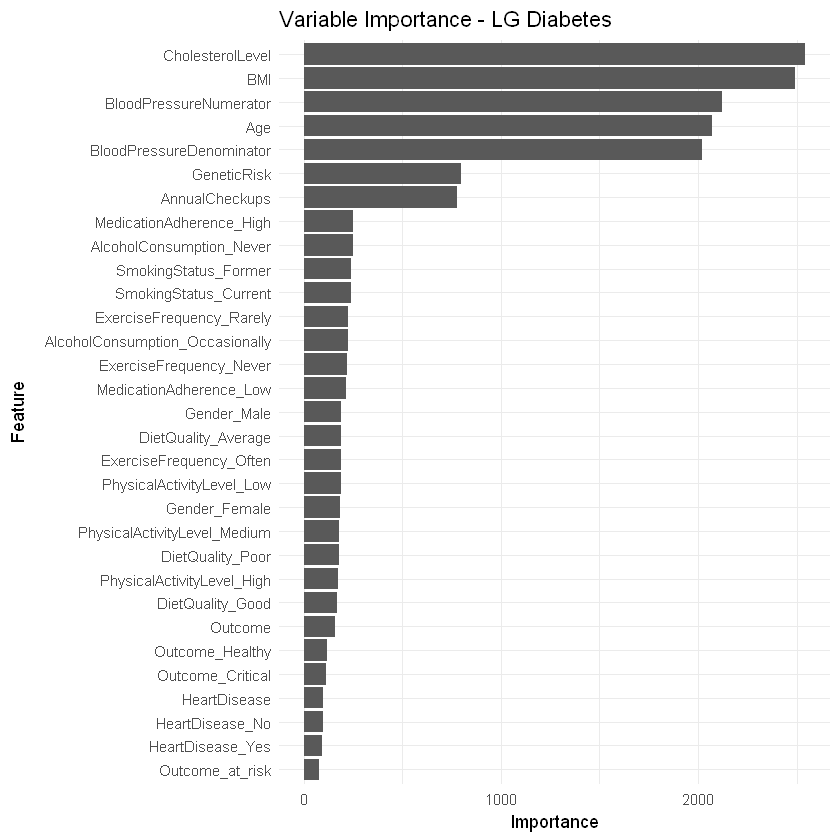

In [73]:
importance_scores_diabetes = rand_forest_log_heart_diabetes$variable.importance
important_vars_df_log_diabetes = data.frame(Variables = names(importance_scores_diabetes),Score= importance_scores_diabetes)

ggplot(important_vars_df_log_diabetes, aes(x = reorder(Variables, Score), y = Score)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance - LG Diabetes",
       x = "Feature",
       y = "Importance") +
  theme_minimal()

In [95]:
predictions_diabetes <- predict(rand_forest_log_heart_diabetes, 
                                    data = dplyr::select(health_data_log_reg_heart_diabetes),type="prob")$predictions
predictions_diabetes <- as.data.frame(predictions_diabetes)

predictions_heart_diabetes <- predictions_diabetes %>%
  mutate(Pred = ifelse(No > 0.8, 0, 1))

actual_heart_diabetes<- ifelse(health_data_log_reg_heart_diabetes$Diabetes == "No", 0, 1)

ERROR: Error in predict.ranger.forest(forest, data, predict.all, num.trees, type, : Error: Invalid value for 'type'. Use 'response', 'se', 'terminalNodes', or 'quantiles'.


In [90]:
actual_factor_diabetes <- factor(actual_heart_diabetes)

conf_matrix_diabetes <- confusionMatrix(as.factor(predictions_heart_diabetes$Pred), actual_factor_diabetes)
print(conf_matrix_diabetes)

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 254511   4477
         1    450  40562
                                         
               Accuracy : 0.9836         
                 95% CI : (0.9831, 0.984)
    No Information Rate : 0.8499         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9332         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9982         
            Specificity : 0.9006         
         Pos Pred Value : 0.9827         
         Neg Pred Value : 0.9890         
             Prevalence : 0.8499         
         Detection Rate : 0.8484         
   Detection Prevalence : 0.8633         
      Balanced Accuracy : 0.9494         
                                         
       'Positive' Class : 0              
                                

In [92]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 4.3.3"


In [93]:
pred = prediction(as.factor(predictions_heart_diabetes$Pred),actual_factor_diabetes)
class(pred)
perf = performance(pred,"tpr","fpr") #tpr and fpr are true and false postive rates
plot(perf,colorize=T)

ERROR: Error: Format of predictions is invalid. It couldn't be coerced to a list.
